<a href="https://colab.research.google.com/github/windapratiwi215/data-science-Project2-E-commerce/blob/main/Data_Science_Projek_2_DS_27_Winda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Example

In [ ]:
import pandas as pd

#defining my worksheet
wordsheet = gc.open('dataset-ecommerce_Winda').sheet1

#get_all_value gives a list of rows
rows = wordsheet.get_all_values()

#convert to a Dataframe pandas
df = pd.DataFrame(rows)

#membuat row pertama menjadi head
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
2,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
3,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
4,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
5,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51299,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51300,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51301,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,$85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


## Data Manipulation

In [ ]:
#converting to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])

#sorting for data in chronological order
df = df.sort_values(by='Order Date')
df

#menghilangkan $ di kolom sales
df['Sales'] = df['Sales'].str.replace("[^\d.]", "", regex=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  object        
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

## Line Chart

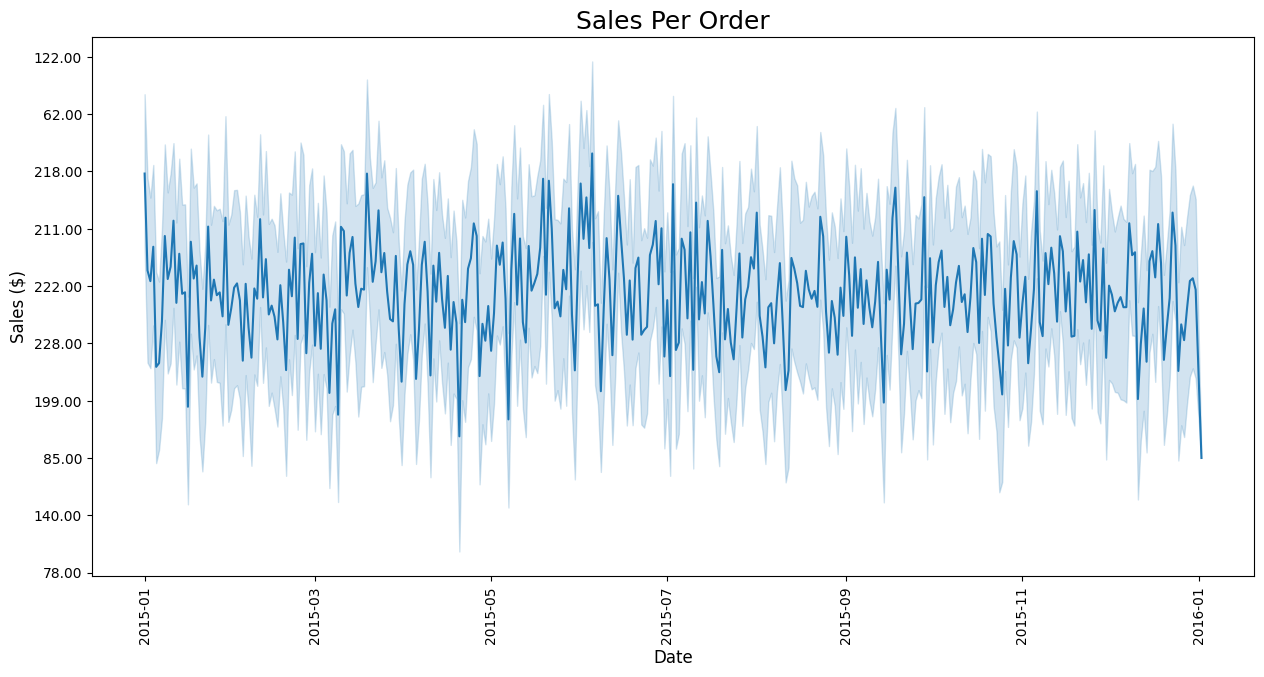

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# figure size in inches
plt.rcParams['figure.figsize'] = 15,7

#rotating x-axis value
plt.xticks(rotation = 'vertical')

#line plot
sns.lineplot(data = df, x='Order Date', y='Sales')

#labeling
plt.title(f"Sales Per Order", fontsize=18)#title
plt.xlabel("Date", fontsize=12) #x-axis label
plt.ylabel("Sales ($)", fontsize=12) #y-axis label

#showing plot
plt.show()

## Pie Chart

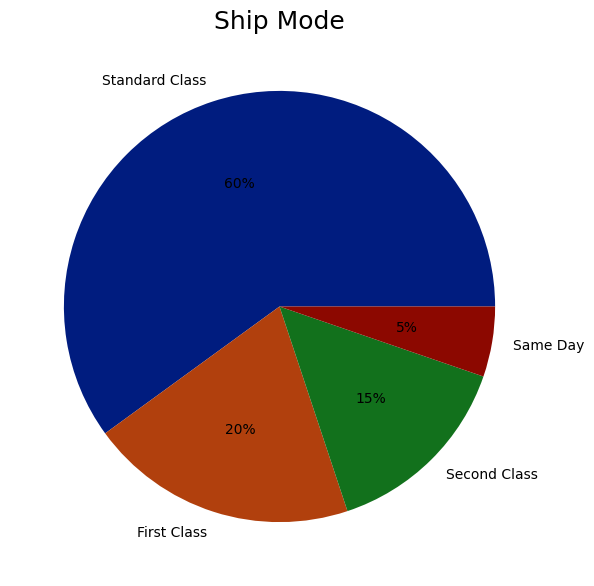

In [ ]:
from tensorflow.python.ops.gen_nn_ops import softplus
from seaborn.rcmod import palettes
data = df['Ship Mode'].value_counts()#banyak datanya
keys = df['Ship Mode'].unique()#label

#define seaborn color palette to use
palettes_color = sns.color_palette("dark")
#plotting data on chart
plt.pie(data, labels=keys, colors=palettes_color, autopct='%.0f%%')
plt.title(f"Ship Mode", fontsize=18)
#displaying chart
plt.show()

## Bar Chart

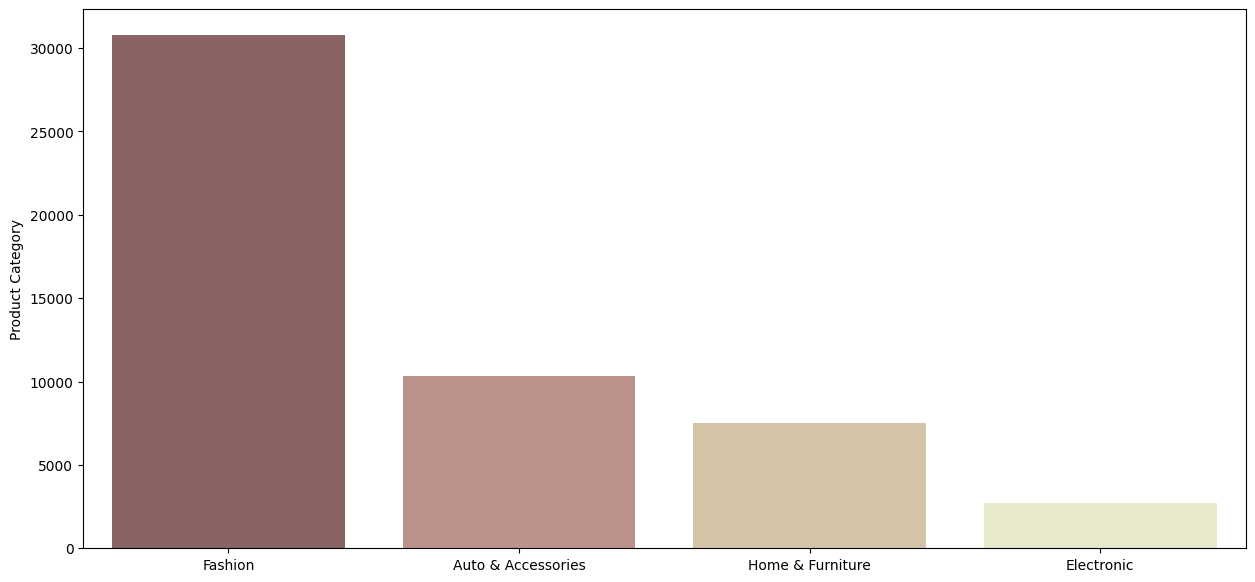

In [ ]:
y = df['Product Category'].value_counts()
x = df['Product Category'].unique()

sns.barplot(x=x, y=y, palette="pink")

plt.show()

# DS Project 2 - Tugas 1

Buat visualisasi Univariate atau Bivariate dari Dataset diatas(Gunakan Bar Chart, Pie Chart, atau Line Chart) minimal 5 Visualisasi Selain yang di atas

## Chart 1

Persentase Order Priority dari Orderan menggunakan pie chart

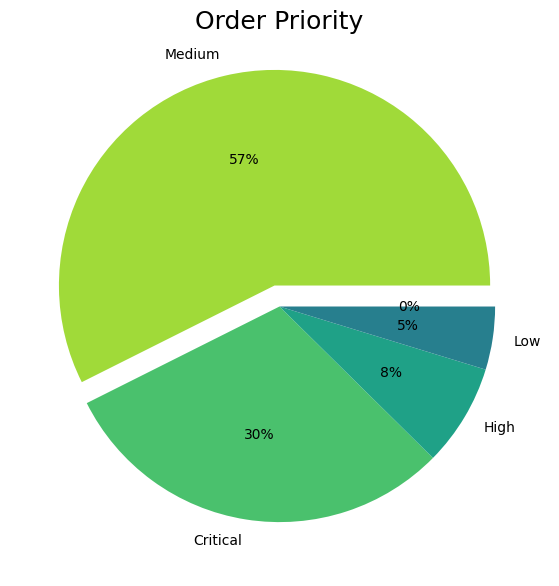

In [ ]:
data = df['Order Priority'].value_counts()#banyak datanya
keys = df['Order Priority'].unique()#label
explode =(0.1, 0, 0,0,0) # memberi jarak antar pie

#define seaborn color palette to use
palettes_color = sns.color_palette("viridis_r")
#plotting data on chart
plt.pie(data, labels=keys, colors=palettes_color, autopct='%.0f%%', explode=explode)
plt.title(f"Order Priority", fontsize=18)
#displaying chart
plt.show()

Prioritas order "Medium" memiliki persentase terbesar, yaitu 57%. Hal ini menunjukkan bahwa mayoritas order dalam data tersebut memiliki tingkat prioritas yang ditetapkan sebagai "Medium". Oleh karena itu sebagian besar pelanggan memiliki kebutuhan yang relatif standar atau tidak terlalu mendesak.

## Chart 2

Profit tiap bulan menggunakan line chart

In [ ]:
#hapus $ di kolom profit
df['Profit'] = df['Profit'].str.replace("[^\d.]", "", regex=True)
#ubah tipe data di kolom profit menjadi float
df['Profit'] = df['Profit'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  float64       
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

In [ ]:
# Mengelompokkan data per bulan dan menjumlahkan kolom "Profit"
df_agg = df.groupby(pd.DatetimeIndex(df['Order Date']).to_period('M')).sum()['Profit']

df_agg = df_agg.to_frame()
df_agg


<ipython-input-120-102cdb980bac>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(pd.DatetimeIndex(df['Order Date']).to_period('M')).sum()['Profit']


,Profit
Order Date,
2015-01,313582.7
2015-02,286113.8
2015-03,317202.6
2015-04,308278.2
2015-05,313766.5
2015-06,307597.3
2015-07,318715.9
2015-08,310558.3
2015-09,305349.4


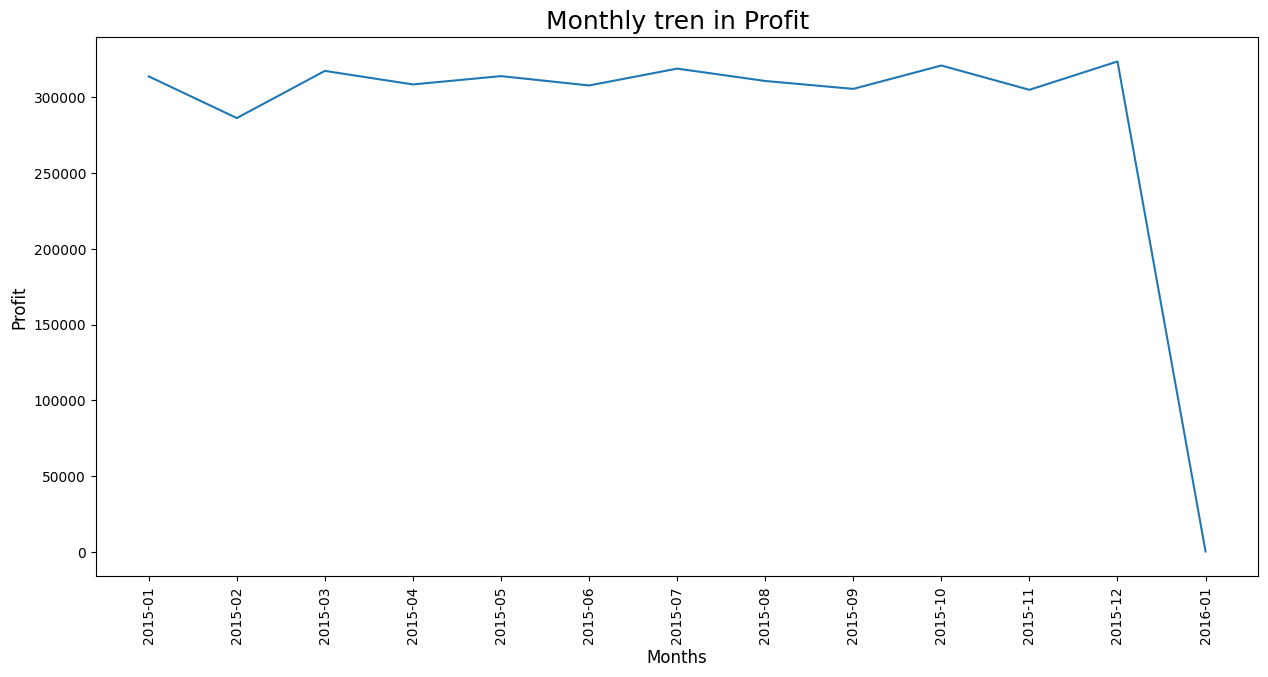

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the index to string
df_agg.index = df_agg.index.astype(str)

# Set the figure size
plt.figure(figsize=(15, 7))

# Create the line plot
sns.lineplot(data=df_agg, x=df_agg.index, y='Profit')

# Set the title and labels
plt.title("Monthly tren in Profit", fontsize=18)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


Terjadi penurunan profit menjelang akhir tahun

## Chart 3

Persentase Segment dari orderan menggunakan pie chart

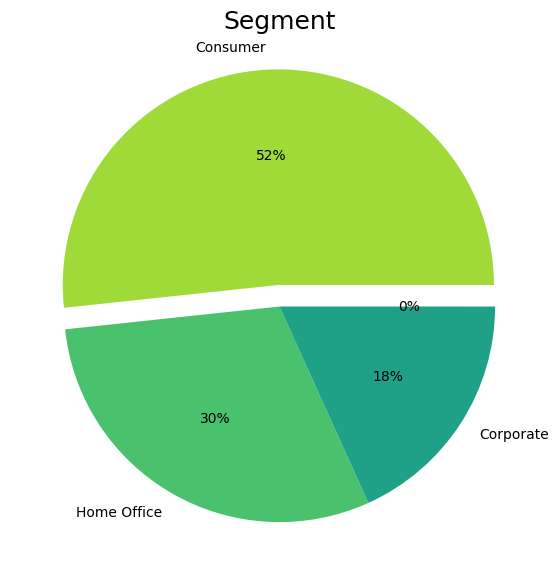

In [ ]:
# mengetahui persentase Segment dari orderan
data = df['Segment'].value_counts()#banyak datanya
keys = df['Segment'].unique()#label
explode =(0.1, 0, 0,0) # memberi jarak antar pie

#define seaborn color palette to use
palettes_color = sns.color_palette("viridis_r")
#plotting data on chart
plt.pie(data, labels=keys, colors=palettes_color, autopct='%.0f%%', explode=explode)
plt.title(f"Segment", fontsize=18)
#displaying chart
plt.show()

Dari semua orderan, segment consumer memiliki presentase terbesar yaitu 52% dari orderan segmen lainnya, artinya segmen individu atau pelanggan perorangan yang membeli produk atau layanan untuk kebutuhan pribadi mereka tersebut paling banyak orderannya.

## Chart 4

10 produk yang paling banyak di order menggunakan bar chart

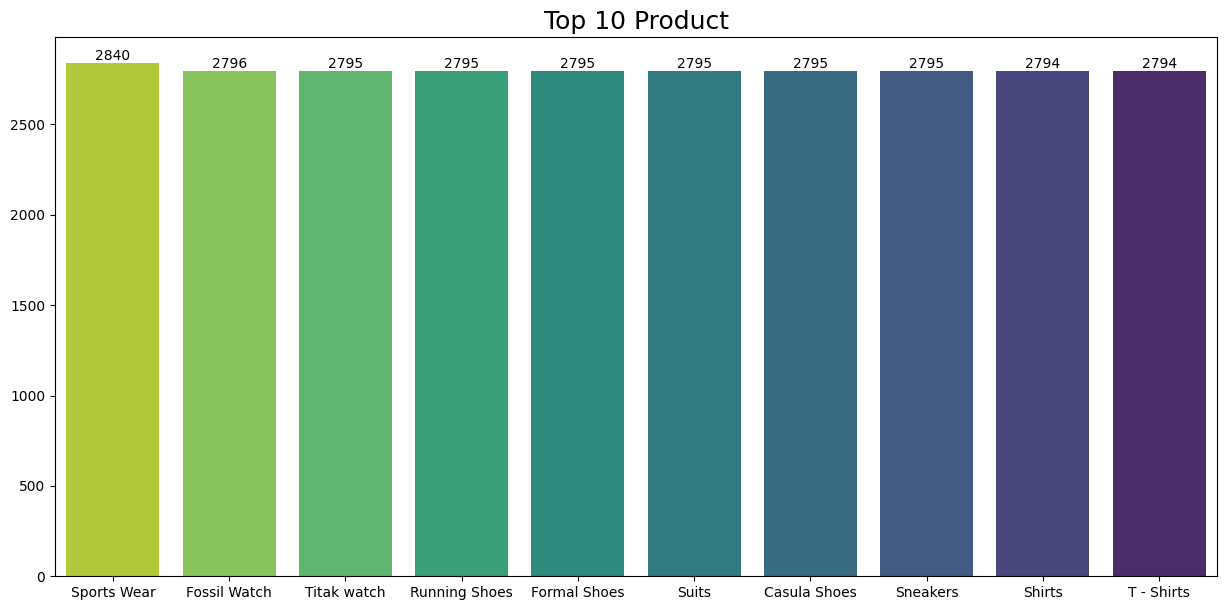

In [ ]:
# mencari 10 produk yang paling banyak di order
top_10_products = df['Product'].value_counts().head(10)
x = top_10_products.index
y = top_10_products.values

ax=sns.barplot(x=x, y=y, palette="viridis_r")
# Menambahkan label nilai pada setiap bar
for i, v in enumerate(y):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title(f"Top 10 Product", fontsize=18)
plt.show()

10 kategori produk yang memiliki orderan terbanyak yaitu produk Sports Wear, Fossil Watch,Titak watch, Running Shoes, Formal Shoes, Suits, Casual Shoes, Sneakers, Shirts, dan T-Shirts.

## Chart 5

Profit disetiap country menggunakan bar chart

<ipython-input-124-28877a3dd4c7>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_agg = df.groupby(df['Country']).sum()['Profit']


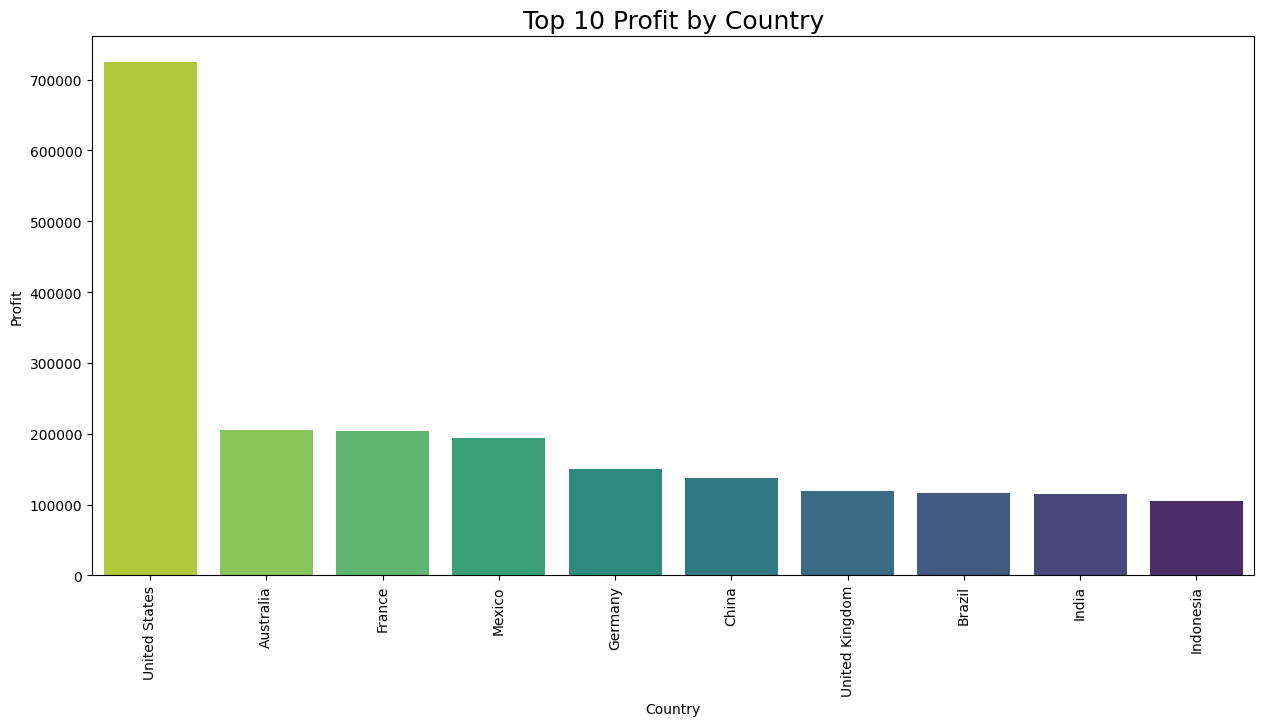

In [ ]:
# Mengelompokkan data per country dan menjumlahkan kolom "Profit"
df_agg = df.groupby(df['Country']).sum()['Profit']

df_agg = df_agg.to_frame()
df_agg

# mencari 10 country dengan profit paling tinggi
top_10_country_by_profit = df_agg.sort_values(by="Profit", ascending=False).head(10)
x = top_10_country_by_profit.index
y = top_10_country_by_profit["Profit"]

ax=sns.barplot(x=x, y=y, palette="viridis_r")
# Rotasi label sumbu x agar mudah terbaca
plt.xticks(rotation='vertical')
plt.title(f"Top 10 Profit by Country", fontsize=18)
plt.show()

Terdapat 10 negara yang menghasilkan profit tertinggi yaitu United States, Australia, France, Mexico, Germany, China, United Kingdom, Brazil, India, dan Indonesia. kemudian negara dengan profit tertinggi adalah United States.

## Chart 6

Rata-rata aging di setiap product category menggunakan bar chart

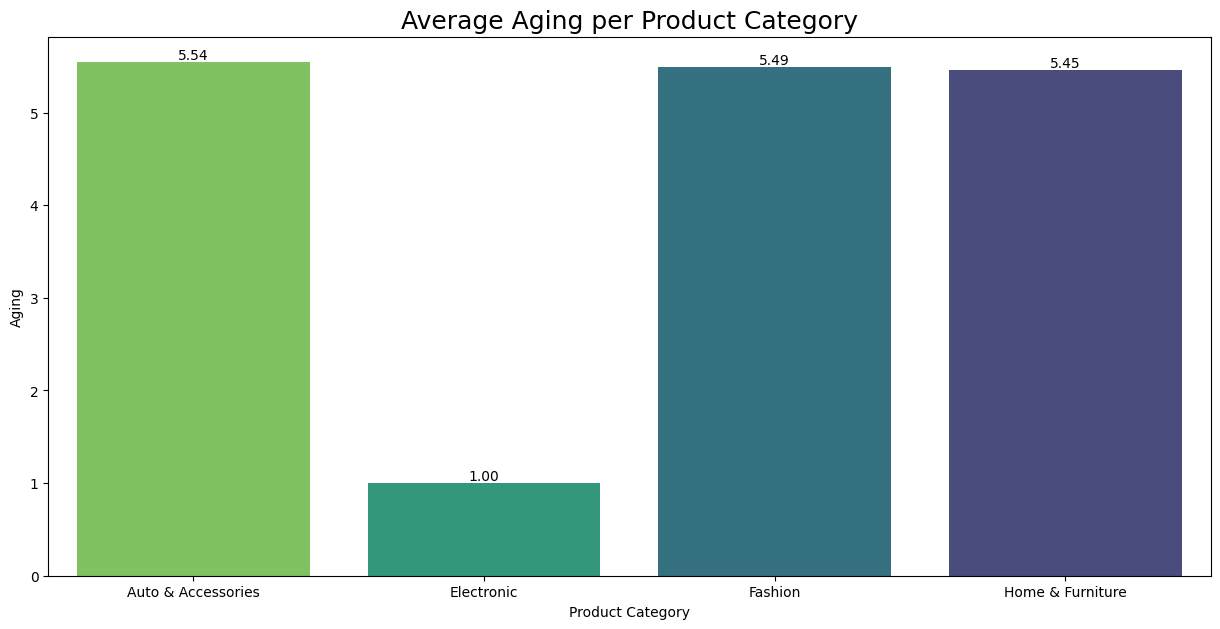

In [ ]:
# Membersihkan nilai kosong
df['Aging'] = df['Aging'].replace('', float('nan'))

# Mengubah tipe data kolom 'Aging' menjadi float
df['Aging'] = df['Aging'].astype(float)


# Mengelompokkan data per 'Product Category' dan merata-ratakan kolom 'Aging'
df_agg = df.groupby('Product Category')['Aging'].mean()

# Mengubah tipe data indeks menjadi string
df_agg.index = df_agg.index.astype(str)

# Membuat bar chart
ax = sns.barplot(x=df_agg.index, y=df_agg, palette="viridis_r")

# Menambahkan label nilai di bar chart
for i, value in enumerate(df_agg):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Rotasi label sumbu x agar mudah terbaca
plt.xticks(rotation='horizontal')
plt.title("Average Aging per Product Category", fontsize=18)
plt.show()


Rata-rata Aging atau waktu pemrosesan pesanan yang paling cepat yaitu pada kategori produk 'Elecronic' selama 1 hari. Kaegori lainnya seperti 'Auto & Accessories', 'Fashion', dan 'Home & Furniture' memerlukan rata-rata waktu pemrosesan pesanan selama 5 harian.